# My findings in TMDb Movie Dataset
## by Sunny Paul

## Investigation Overview

The goal of this presentation is to ask some questions mainly about the relationships between movie budgets, revenue, ratings and their popularity.

## Dataset Overview

For my project, I have chosen to work with the TMDb Movies dataset. This is a large dataset that stores information about most popular (and also less popular) movies such as:

- **popularity:** This is a measure of a movie's popularity.

- **vote count:** The number of votes a given movie has received.

- **vote average:** This is the average rating of a given movie.

- **budget_adj:** This is the adjusted budget of a given movie. This takes into account the inflation factor of currency.

- **revenue_adj:** This is the adjusted revenue of a given movie. This takes into account the inflation factor of currency.

## Key findings

In a nutshell, the main findings conveyed by the following slides show that movies with small budgets can be popular and be rated as well as movies with higher budgets. This is good news for amateurs and producers who do not have access to big budgets since they can still be successful as big produces and get high revenues.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the csv file into a Pandas dataframe
tmdb_df = pd.read_csv("./tmdb-movies.csv")

## dropping columns

# a list of columns to drop
drop_col = ['id', 'budget', 'revenue', 
            'original_title', 'cast', 'homepage', 
            'tagline', 'keywords', 'overview', 
            'director', 'runtime', 'release_date']

# dropping the columns
tmdb_df = tmdb_df.drop(drop_col, axis = 1)

# drop rows containing null values
tmdb_df = tmdb_df.dropna(axis = 0)

# get the 95% quantile of the popularity variable
pop_90 = tmdb_df.popularity.quantile(q = 0.90)

# replace outliers with the 90% quantile value:
tmdb_df.popularity[tmdb_df.popularity > pop_90] = pop_90

# get the 25th quantile of the vote average variable
vote_av_25 = tmdb_df.vote_average.quantile(q = 0.25)

# get the 75th quantile of the vote average variable
vote_av_75 = tmdb_df.vote_average.quantile(q = 0.75)

# create the ratings variable
tmdb_df['rating'] = pd.cut(x = tmdb_df.vote_average, bins = [0, vote_av_25, vote_av_75, 10], labels = ['low', 'medium', 'high'])

# drop the vote_count and the vote_average columns
tmdb_df = tmdb_df.drop(['vote_average', 'vote_count'], axis = 1)

# remove the rows where the budget is 0
tmdb_df = tmdb_df[tmdb_df.budget_adj != 0]

# remove the rows where the revenue is 0
tmdb_df = tmdb_df[tmdb_df.revenue_adj != 0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1- How a movie's budget affects  it rating?

In the following visualization, I want to explore whether movies with higher budgets have higher rating or not. One might expect that this is the case. However, the plot shows that the budget is not correlated with ratings. Small budgets can make great movies too. **Creativity does not need big money :)**

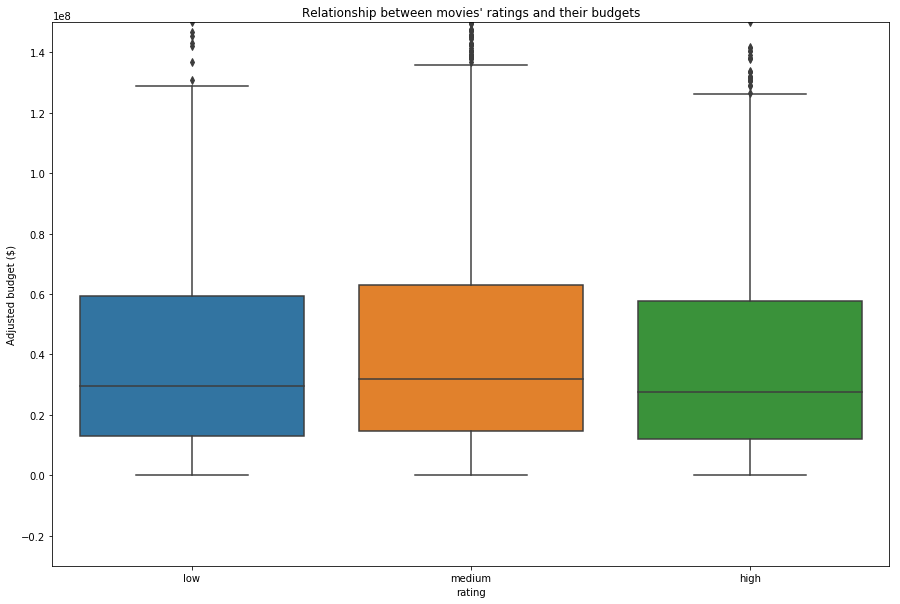

In [6]:
plt.figure(figsize = (15, 10))

# set the limits of the y axis
plt.ylim(-0.3e8, 1.5e8)

# plot the boxplot
ax = sns.boxplot(x = tmdb_df.rating, y = tmdb_df.budget_adj)


# set figure title
ax.set_title("Relationship between movies' ratings and their budgets")

# set axis labels
ax.set_ylabel('Adjusted budget ($)')

plt.show()

## 2- How a movie's revenue affects  it rating?

Now, it would be interesting to explore whether movies with higher ratings has higher revenue. The following figure indicates that this is actually the case. This makes sense since movies that are better rated would potentially be more popular and sell more tickets

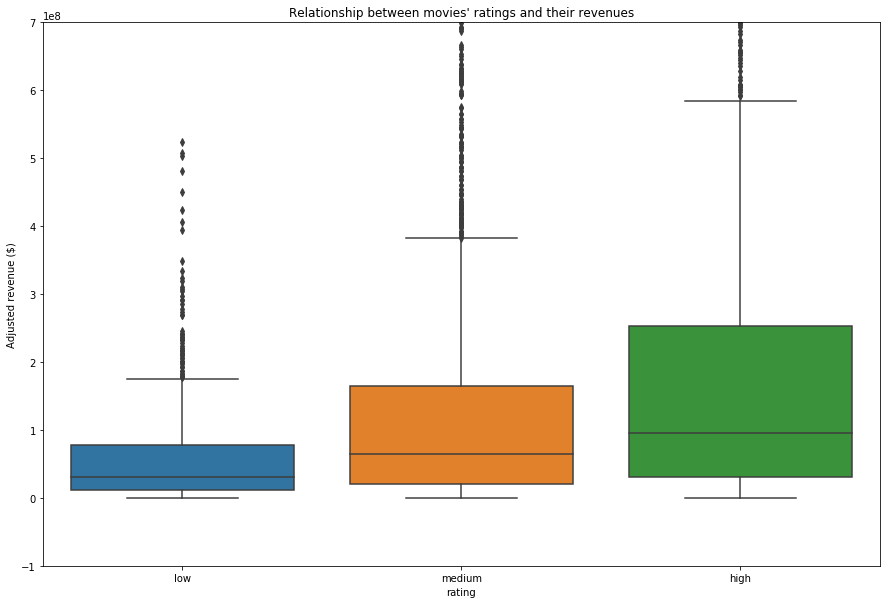

In [4]:
plt.figure(figsize = (15, 10))

# set the limits of the y axis
plt.ylim(-0.1e9, 0.7e9)

# plot the boxplot
ax = sns.boxplot(x = 'rating', y =  'revenue_adj', data = tmdb_df)

# set figure title
ax.set_title("Relationship between movies' ratings and their revenues")

# set axis labels
ax.set_ylabel('Adjusted revenue ($)')

plt.show()

## 3 - What is the relationship between budget, revenue and popularity?

We notice from the below figure that there is some positive correlation between revenue and popularity. On the other hand, the correlation between popularity and budget is very weak.

This makes sense since more popular movies might get more cinema visite and sell more tickets. However, the budget does not affect popularity since small movie producers are capable of producing great movies too.


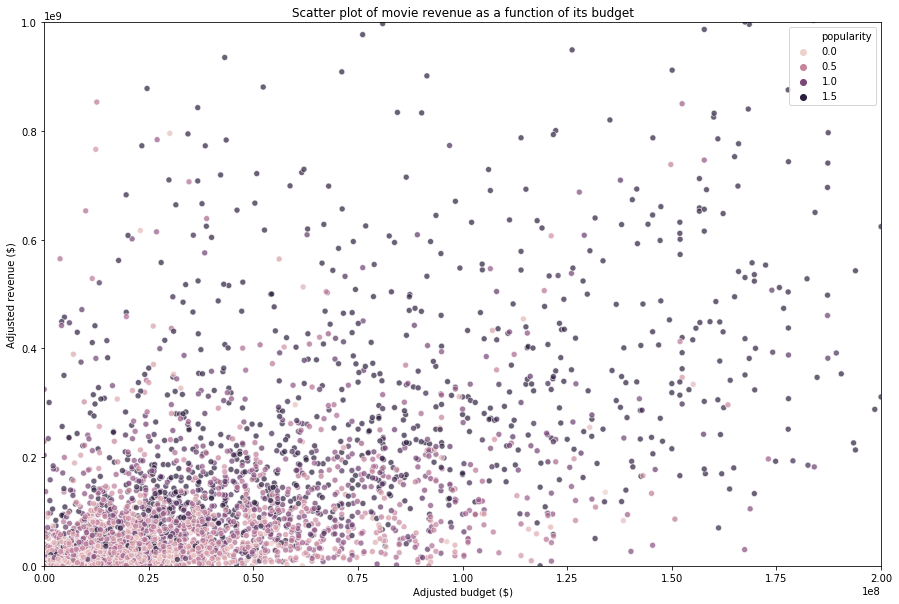

In [5]:
plt.figure(figsize = (15, 10))

# create the scatter plot
ax = sns.scatterplot(x = 'budget_adj', y = 'revenue_adj', hue = 'popularity', alpha = 0.7,
                     data = tmdb_df)

# set some aesthetic parameters
ax.set_title("Scatter plot of movie revenue as a function of its budget")
ax.set_xlim(0,2e8)
ax.set_ylim(0,1e9)

# set axis labels
ax.set_xlabel('Adjusted budget ($)')
ax.set_ylabel('Adjusted revenue ($)')


plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!